In [14]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import matplotlib as mpl
from matplotlib import rcParams
from mpl_toolkits.basemap import Basemap

%matplotlib inline

In [52]:
def Arc_plot(lon,lat,tab,tabn):
        #
# Les 2 lignes suivantes posent un probleme a l'execution lie a LaTex ....
#       rcParams['text.usetex']=True
#       rcParams['text.latex.unicode']=True
        rcParams['font.family']='serif'

        plt.rcParams['contour.negative_linestyle'] = 'solid'
        #
        m = Basemap(projection='npstere',boundinglat=65,lon_0=30, resolution='i')

        zfontsize=12.
        m.drawparallels(np.arange(-90.,91.,5.),labels=[False,False,False,False], size=zfontsize, linewidth=0.3)
        m.drawmeridians(np.arange(-180.,181.,20.),labels=[True,False,False,True], size=zfontsize, latmax=90.,linewidth=0.3)
        m.fillcontinents(color='grey',lake_color='white')

#        zlim=zinfo['nam_lim']
#        zscale=zinfo['nam_scal']

#        pal = plt.cm.get_cmap('Spectral_r')
#        norm = mpl.colors.Normalize(vmin=zlim[0], vmax=zlim[1])
#        contours=np.arange(300.,3000.,200)
#        myticks=np.arange(zlim[0],zlim[1]+zlim[2],zlim[2]/2.)
        vmin=2000. ; vmax=6000. ; vint=100.
        zcontours=np.arange(vmin,vmax+vint,vint)
        #limits=[vmin,vmax]

        X,Y = m(lon,lat)
        #m.contour(X,Y,tab,levels=100,colors='k')
        #m.contour(X,Y,tabn,levels=100,colors='k')
#        zcontours=np.arange(0.,1000.,100)
#        m.contour(lat,lon,tab,levels=zcontours,cmap='Spectral')
        #m.contour(lat,lon,tabn,contours)
        
        m.contourf(X,Y,tab,zcontours,cmap='Spectral_r',extend='both')
        plt.colorbar()
    
        zcontours=np.arange(2000.,6000.,100)
        C=m.contour(X,Y,tab,levels=zcontours,colors='black',alpha=0.8)
        plt.clabel(C,C.levels,inline=True,fmt='%.0f',fontsize=15)
     
        return

In [16]:
IN='/data0/project/drakkar/CONFIGS/CREG12.L75/GRID/'
ds=xr.open_dataset(IN+'coordinates_CREG12_lbclnk_noz_vh20160930.nc')
ds_msk=xr.open_dataset(IN+'CREG12.L75-REF06_mask.nc')
ds_msk

<xarray.Dataset>
Dimensions:       (t: 1, x: 1580, y: 1801, z: 75)
Dimensions without coordinates: t, x, y, z
Data variables:
    nav_lon       (y, x) float32 ...
    nav_lat       (y, x) float32 ...
    nav_lev       (z) float32 ...
    time_counter  (t) float64 ...
    tmask         (t, z, y, x) int8 ...
    umask         (t, z, y, x) int8 ...
    vmask         (t, z, y, x) int8 ...
    fmask         (t, z, y, x) int8 ...
    tmaskutil     (t, y, x) int8 ...
    umaskutil     (t, y, x) int8 ...
    vmaskutil     (t, y, x) int8 ...
    fmaskutil     (t, y, x) int8 ...
Attributes:
    file_name:  mask.nc
    TimeStamp:  06/06/2019 11:12:46 +0200

In [17]:
dt=xr.Dataset()
#dt.coords['nav_lat']=ds['nav_lat'].where(ds_msk['tmask'].isel(t=0,z=0))
#dt.coords['nav_lon']=ds['nav_lon'].where(ds_msk['tmask'].isel(t=0,z=0))
dt.coords['nav_lat']=ds['nav_lat']*ds_msk['tmask'].isel(t=0,z=0)
dt.coords['nav_lon']=ds['nav_lon']*ds_msk['tmask'].isel(t=0,z=0)
dt.coords['tmask']=ds_msk['tmask'][0,0,:,:]
dt['e1t']=(('y','x'),ds['e1t'][:,:].where(ds_msk['tmask'].isel(t=0,z=0)))
dt['e2t']=(('y','x'),ds['e2t'][:,:].where(ds_msk['tmask'].isel(t=0,z=0)))

In [18]:
dt

<xarray.Dataset>
Dimensions:  (x: 1580, y: 1801)
Coordinates:
    nav_lat  (y, x) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0 0.0
    nav_lon  (y, x) float32 -0.0 -0.0 -0.0 -0.0 -0.0 ... 0.0 0.0 0.0 0.0 0.0
    tmask    (y, x) int8 ...
Dimensions without coordinates: x, y
Data variables:
    e1t      (y, x) float64 nan nan nan nan nan nan ... nan nan nan nan nan nan
    e2t      (y, x) float64 nan nan nan nan nan nan ... nan nan nan nan nan nan

/venv/py3-phyocean/lib/python3.6/site-packages/xarray/plot/plot.py:934: UserWarning: The following kwargs were not used by contour: 'linestyle'
  primitive = ax.contour(x, y, z, **kwargs)


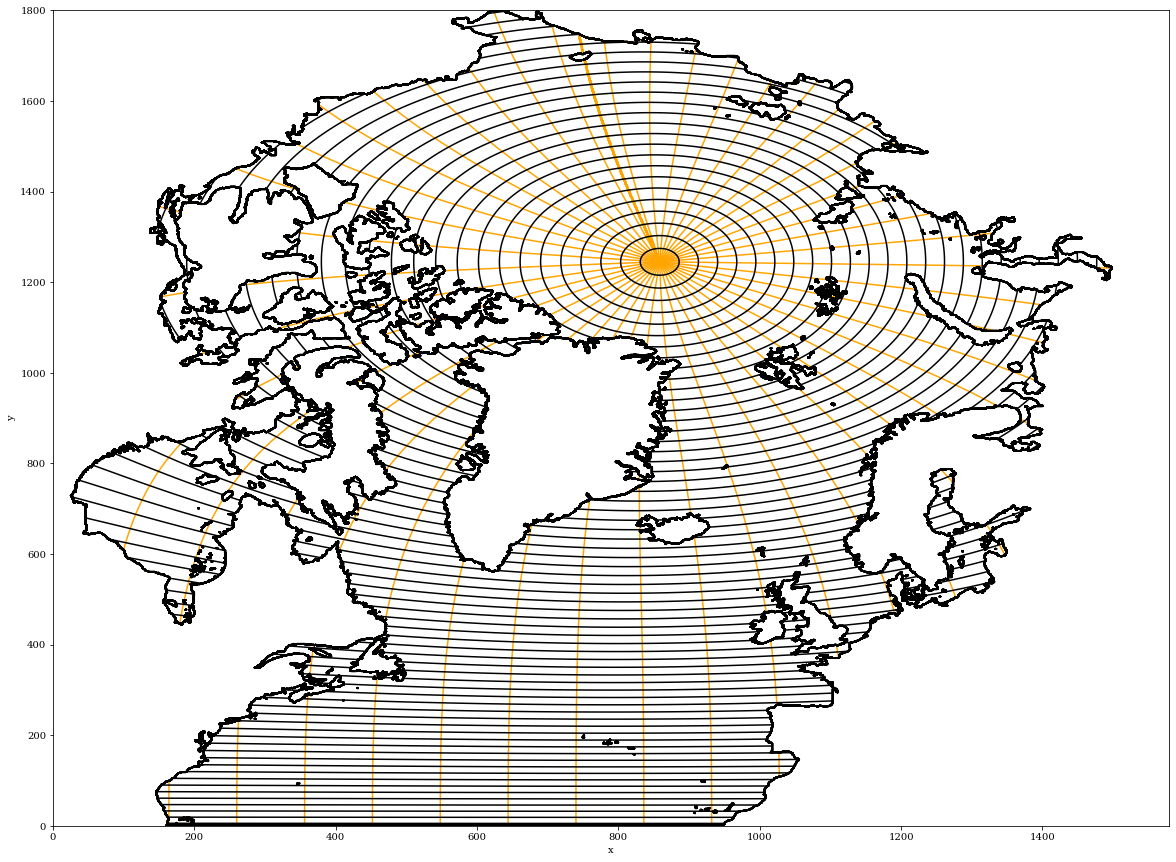

In [43]:
plt.figure(figsize=(20,15))
plt.rcParams['contour.negative_linestyle'] = 'solid'
dt.nav_lon.plot.contour(levels=60,colors='orange',linestyle='solid')
dt.nav_lat.plot.contour(levels=110,colors='k')

<Figure size 432x288 with 0 Axes>

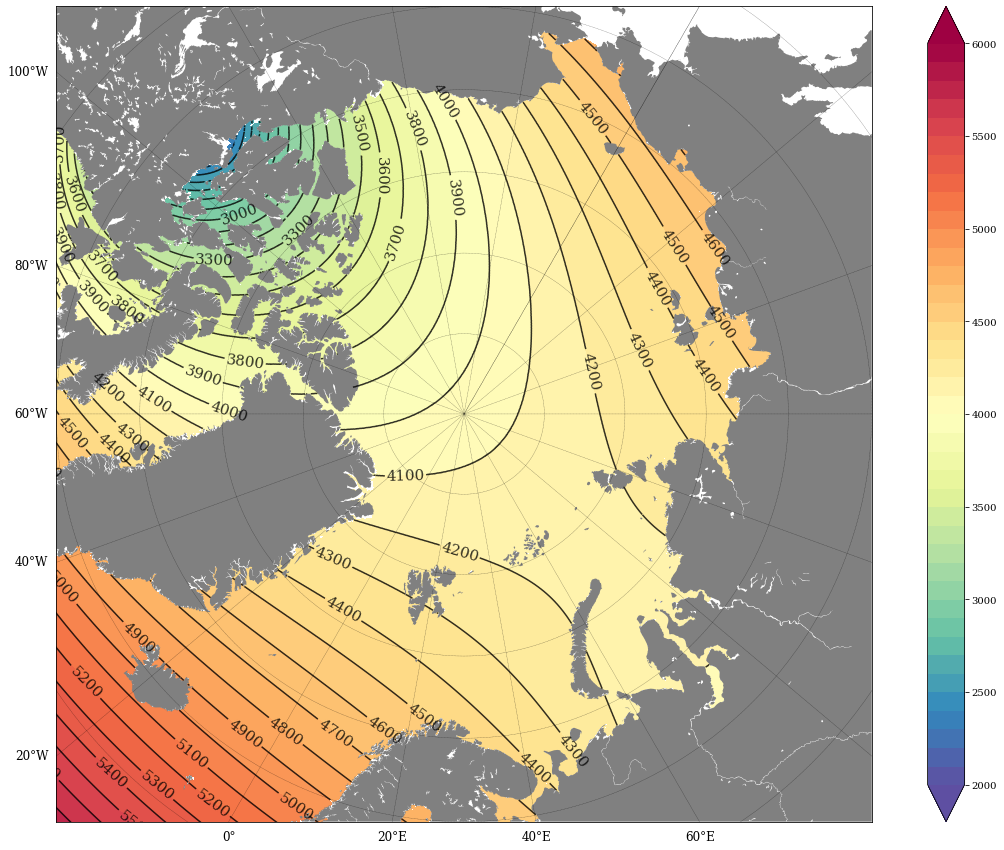

In [53]:

plt.clf()
plt.figure(figsize=(20,15))

Arc_plot(np.array(dt['nav_lon']), np.array(dt['nav_lat']), np.array(dt['e1t']), np.array(dt['e2t']) )
#Arc_plot(np.array(dt['nav_lon']), np.array(dt['nav_lat']), np.array(dt['e1t']) )